## PREDICTING WIND TURBINE POWER OUTPUT FROM WIND SPEED VALUES 
## using LINEAR REGRESSION

#### Objectives
##### 1 Perform linear regression on the dataset.
##### 2 Explain what this shows.
##### 3 Predict wind speed power output from wind speed values.

In [ ]:
#### SOURCES

https://www.w3schools.com/python/python_ml_linear_regression.asp
    
https://realpython.com/linear-regression-in-python/#regression
    
https://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html

    

In [1]:
# importing library and dataset.
import pandas as pd

dfpower = pd.read_csv("https://raw.githubusercontent.com/ianmcloughlin/2020A-machstat-project/master/dataset/powerproduction.csv")

# examining what type is our data.
dfpower.dtypes


speed    float64
power    float64
dtype: object

In [2]:
# looking at the heads and ends of dataset.
print(dfpower)

      speed  power
0     0.000    0.0
1     0.125    0.0
2     0.150    0.0
3     0.225    0.0
4     0.275    0.0
..      ...    ...
495  24.775    0.0
496  24.850    0.0
497  24.875    0.0
498  24.950    0.0
499  25.000    0.0

[500 rows x 2 columns]


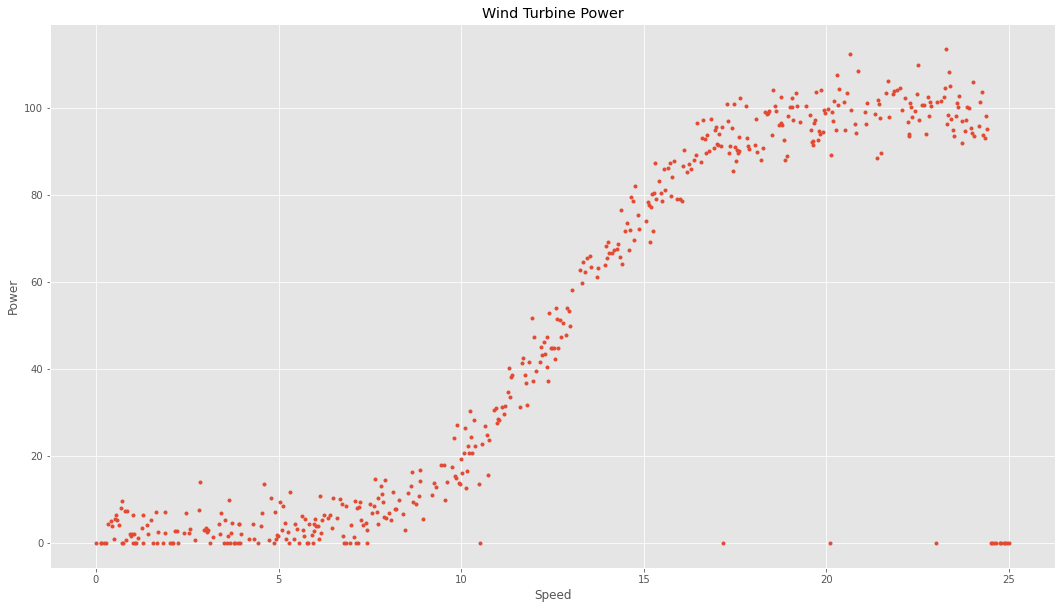

In [3]:
# import libraries
import matplotlib.pyplot as plt
import numpy as np

# x = speed, y= power
x = dfpower.iloc[:,[0]]
y = dfpower.iloc[:,[1]]

# plot each (x,y) dot on graph.
plt.style.use("ggplot")
plt.rcParams["figure.figsize"] = (18,10)
plt.title("Wind Turbine Power")
plt.xlabel("Speed")
plt.ylabel("Power")
plt.plot(x, y, '.')

In [26]:
import numpy as np
from sklearn.linear_model import LinearRegression

x = dfpower.iloc[:,[0]]
y = dfpower.iloc[:,[1]]

model=LinearRegression()
model.fit(x,y)

r_sq = model.score(x,y)
print("coefficient of determination:", r_sq)
print("intercept:", model.intercept_)
print("slope:", model.coef_)

coefficient of determination: 0.7289360258564073
intercept: [-13.89990263]
slope: [[4.91759567]]


In [28]:
y_pred = model.intercept_+model.coef_*x
print("predicted response:",y_pred, sep="/n")

predicted response:/n          speed
0    -13.899903
1    -13.285203
2    -13.162263
3    -12.793444
4    -12.547564
..          ...
495  107.933530
496  108.302350
497  108.425290
498  108.794109
499  109.039989

[500 rows x 1 columns]


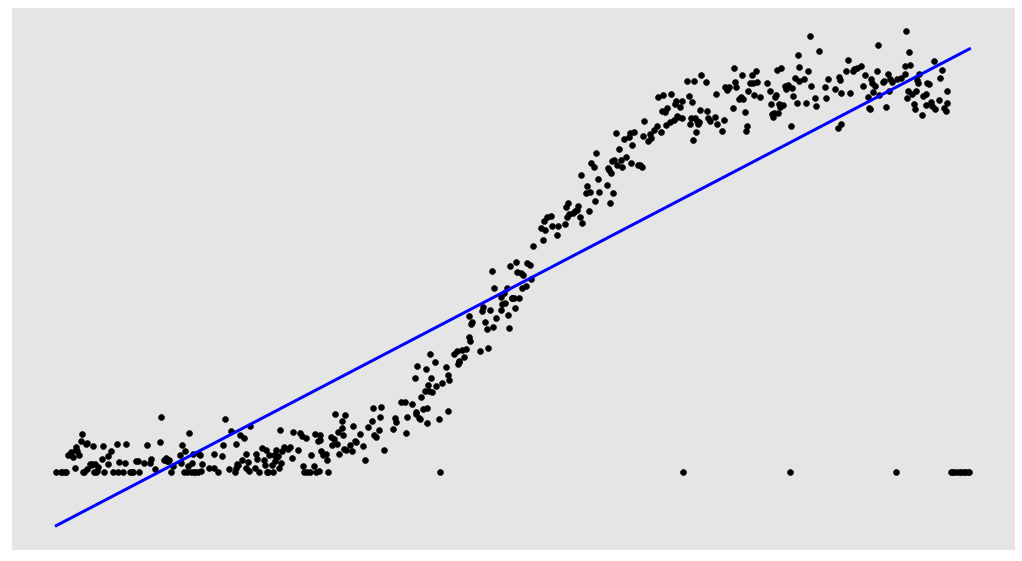

In [30]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model




# Plot outputs
plt.scatter(x, y,  color='black')
plt.plot(x, y_pred, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()